In [ ]:
"""
Plot model accuracy and loss from log files

In the log file conv-32-64-128-lin-512-2-model-1588009585
we ran the training model for 10 epochs and we can see that 
we have overtrained our model with no benefits to our test data.
"""

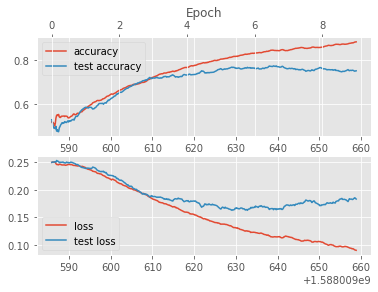

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from pandas import read_csv

style.use("ggplot")

log_folder = "convnet_logs/"
model_name = "conv-32-64-128-lin-512-2-model-1588009585"
# modelname,time,epoch,accuracy,loss,test_accuracy,test_loss
df = read_csv(log_folder + model_name + ".log")
    
fig = plt.figure()

ax1 = plt.subplot2grid((2, 1), (0, 0))
ax2 = plt.subplot2grid((2, 1), (1, 0), sharex=ax1)


ax1.plot(df["time"], df["accuracy"].ewm(alpha=.02).mean(), label="accuracy")
ax1.plot(df["time"], df["test_accuracy"].ewm(alpha=.02).mean(), label="test accuracy")
ax1.legend(loc=2)

# Add a seond x axis to plot the epoch -- useful to find when overtraining occurs
secax = ax1.twiny()
secax.set_xlabel("Epoch")
# Kind of hacky - but plots the epoch as an invisible line using the average of the accuracy line so I don't mess up the y-axis
secax.plot(df["epoch"], [df["accuracy"].mean()]*df["epoch"].size, alpha=0)

ax2.plot(df["time"], df["loss"].ewm(alpha=.02).mean(), label="loss")
ax2.plot(df["time"], df["test_loss"].ewm(alpha=.02).mean(), label="test loss")
ax2.legend(loc=3)